In [70]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.4
  [780c37f4] Carlo v0.2.5
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
  [033835bb] JLD2 v0.5.15
  [ebeed567] PeriodicArrays v0.1.0 `../../../PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.14


In [71]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [72]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Mag, :Energy, :Dxπ, :Dyπ, :P, :J_s],
)

cleandata (generic function with 1 method)

In [73]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [81]:
jobname = "large-sys"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,80,80,0.000756±1.8e-5,-1.99498±8.3e-6,0.98819±0.00012,0.98817±0.00012,0.0203±0.0016,0.0203±0.0016
2,0.05,-0.005,80,80,0.001706±2.8e-5,-1.9547±2.4e-5,0.9415±0.00047,0.94147±0.00047,0.0373±0.0036,0.0375±0.0036
3,0.1,-0.005,80,80,0.002468±2.4e-5,-1.90359±6.0e-5,0.8752±0.0011,0.8752±0.0011,0.0467±0.0034,0.0507±0.0037
4,0.15,-0.005,80,80,0.003014±2.1e-5,-1.85166±4.9e-5,0.8155±0.002,0.8155±0.002,0.0587±0.0046,0.0644±0.0053
5,0.2,-0.005,80,80,0.003505±2.0e-5,-1.79886±5.9e-5,0.7404±0.0019,0.7403±0.0019,0.0671±0.0048,0.0742±0.0044
6,0.25,-0.005,80,80,0.003959±2.1e-5,-1.74493±9.9e-5,0.6622±0.0044,0.6621±0.0045,0.0648±0.0041,0.0845±0.0052
7,0.3,-0.005,80,80,0.004394±2.2e-5,-1.69045±8.8e-5,0.5967±0.0042,0.5966±0.0042,0.0934±0.0063,0.1028±0.006
8,0.35,-0.005,80,80,0.004789±1.5e-5,-1.6338±0.00015,0.501±0.011,0.501±0.011,0.0932±0.0071,0.1239±0.0075
9,0.4,-0.005,80,80,0.005166±1.7e-5,-1.57565±0.00012,0.414±0.012,0.414±0.012,0.1057±0.0096,0.1283±0.009


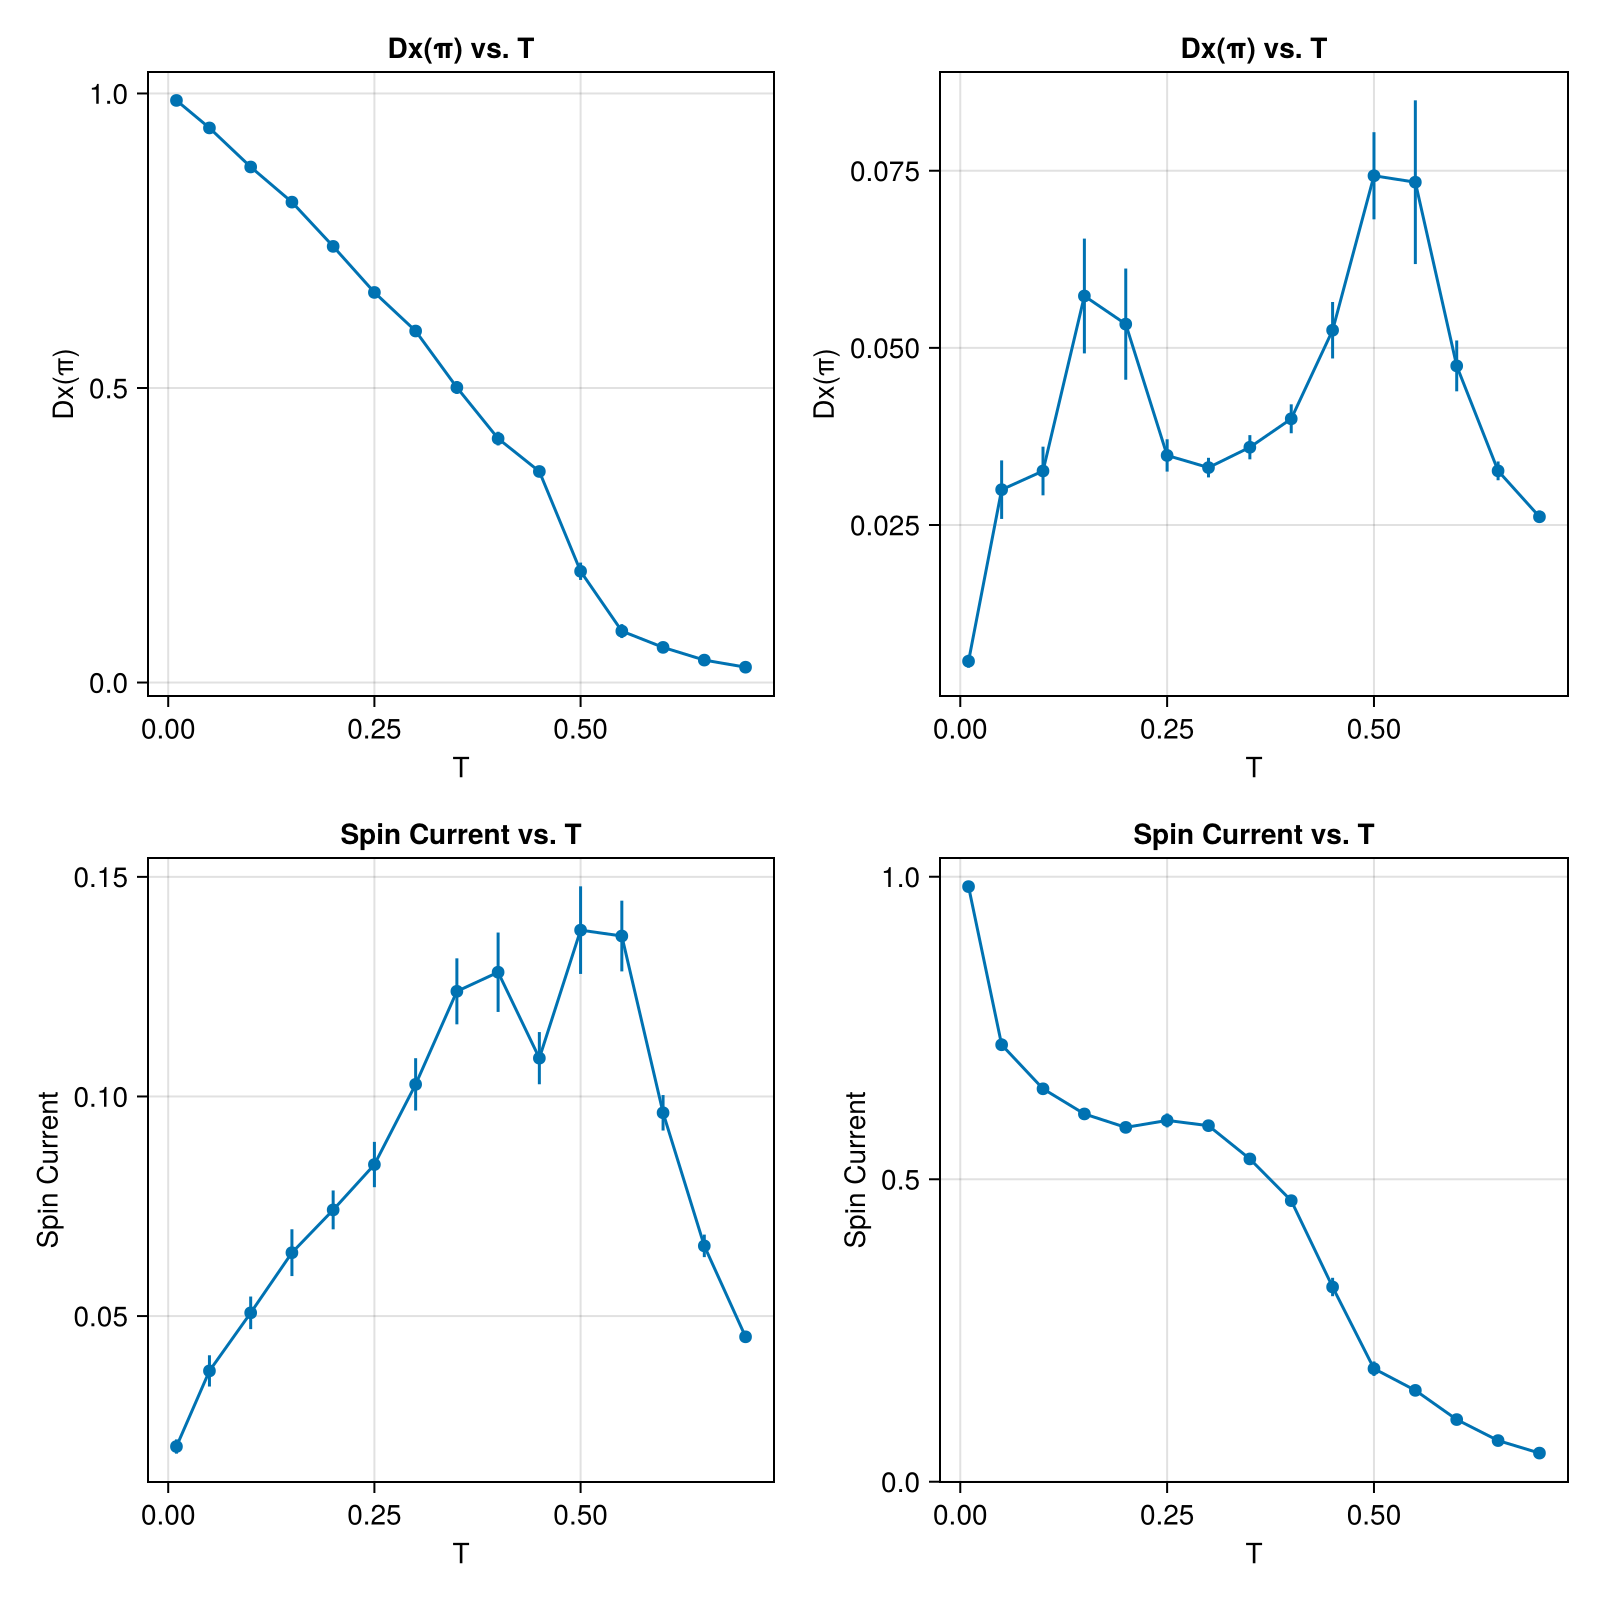

In [82]:
fig = Figure(size=(800, 800))

generatePlot(
    data[1], :T, :Dxπ; fig,
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)
generatePlot(
    data[2], :T, :Dxπ; fig, fig_pos=(1,2),
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)

generatePlot(
    data[1], :T, :J_s; fig, fig_pos=(2,1),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)
generatePlot(
    data[2], :T, :J_s; fig, fig_pos=(2,2),
    title="Spin Current vs. T",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)

# save("temp-sweep-plots/Dx-P-plots.png", fig)
fig

In [83]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,80,80,0.000756±1.8e-5,-1.99498±8.3e-6,0.98819±0.00012,0.98817±0.00012,0.0203±0.0016,0.0203±0.0016
2,0.05,-0.005,80,80,0.001706±2.8e-5,-1.9547±2.4e-5,0.9415±0.00047,0.94147±0.00047,0.0373±0.0036,0.0375±0.0036
3,0.1,-0.005,80,80,0.002468±2.4e-5,-1.90359±6.0e-5,0.8752±0.0011,0.8752±0.0011,0.0467±0.0034,0.0507±0.0037
4,0.15,-0.005,80,80,0.003014±2.1e-5,-1.85166±4.9e-5,0.8155±0.002,0.8155±0.002,0.0587±0.0046,0.0644±0.0053
5,0.2,-0.005,80,80,0.003505±2.0e-5,-1.79886±5.9e-5,0.7404±0.0019,0.7403±0.0019,0.0671±0.0048,0.0742±0.0044
6,0.25,-0.005,80,80,0.003959±2.1e-5,-1.74493±9.9e-5,0.6622±0.0044,0.6621±0.0045,0.0648±0.0041,0.0845±0.0052
7,0.3,-0.005,80,80,0.004394±2.2e-5,-1.69045±8.8e-5,0.5967±0.0042,0.5966±0.0042,0.0934±0.0063,0.1028±0.006
8,0.35,-0.005,80,80,0.004789±1.5e-5,-1.6338±0.00015,0.501±0.011,0.501±0.011,0.0932±0.0071,0.1239±0.0075
9,0.4,-0.005,80,80,0.005166±1.7e-5,-1.57565±0.00012,0.414±0.012,0.414±0.012,0.1057±0.0096,0.1283±0.009


In [84]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]

        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
            label="P"
        )
        Js_samples = read(observables, "J_s/samples")
        lines!(
            ax_P,
            collect(init:n),
            Js_samples[init:n],
            label="Spin Current"
        )
        axislegend(ax_P, position=:rb)

        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy            Dxπ          Dyπ          P              J_s         
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…         Measurem…    Measurem…    Measurem…      Measurem…   
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  11 │     0.5   -0.005     80     80  0.005872±1.5e-5  -1.45268±0.00012  0.189±0.015  0.189±0.015  0.1042±0.0086  0.1379±0.01

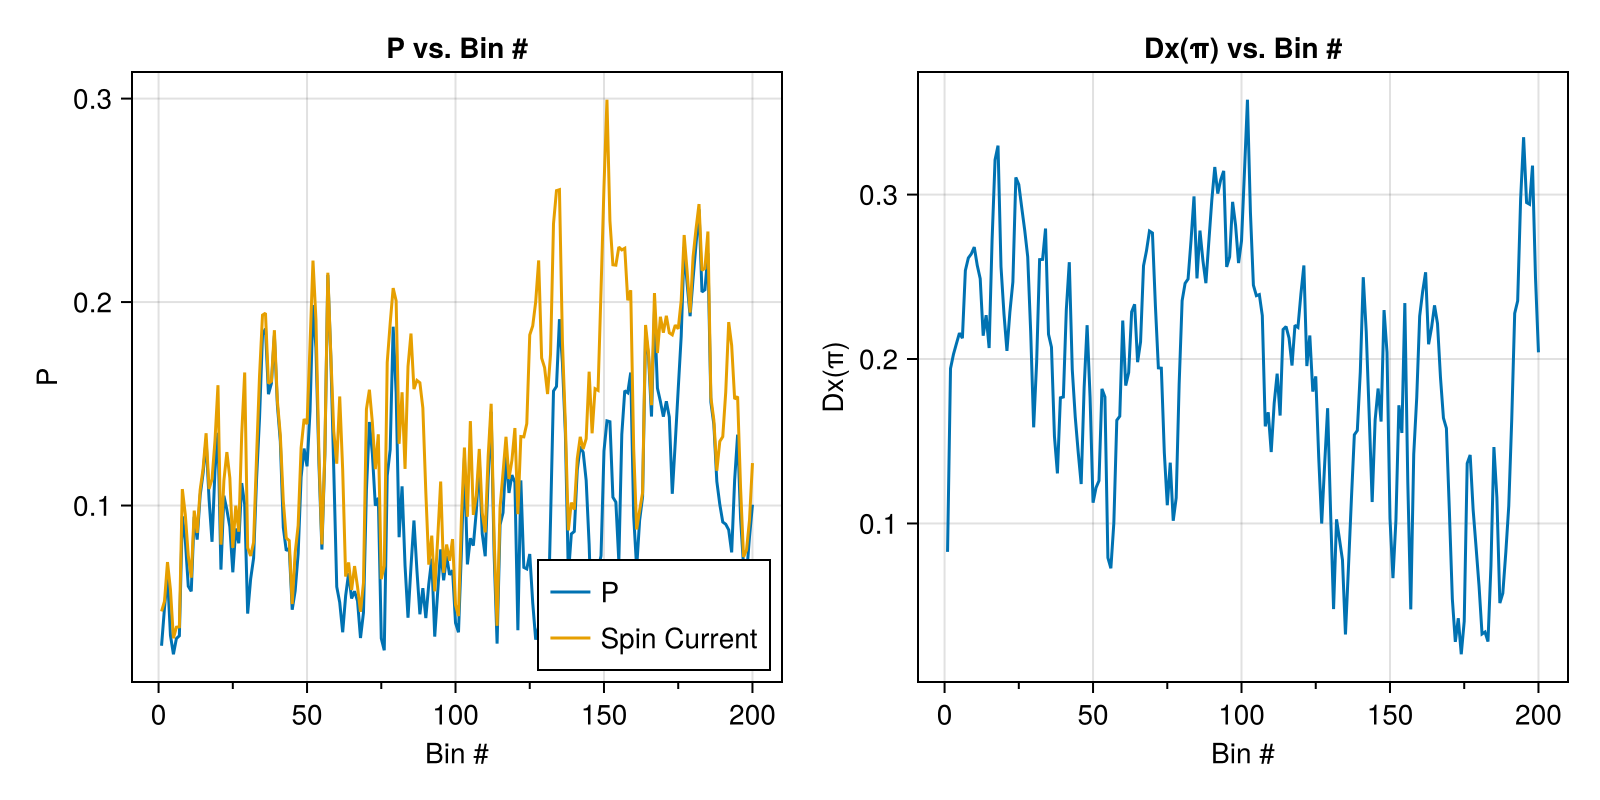

In [98]:
i = 11
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [86]:
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"
sweep_no = 50000

fig = Figure(size=(600, 600))
jldopen(filename, "r") do file
    spins = file["sweep$sweep_no"]
    spinxs = map(v -> v[1], spins)
    spinys = map(v -> v[2], spins)
    spinzs = map(v -> v[3], spins)
    strength = vec(spinzs)

    fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
    arrows2d!(1:Lx, 1:Ly, spinxs, spinys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

save("temp-sweep-plots/spins.png", fig)
fig

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 /Users/XT/.julia/packages/JLD2/SgtOb/src/JLD2.jl:154


SystemError: SystemError: opening file "../jobs/large-sys.data/task0010/spins.jld2": No such file or directory

In [87]:
print(ungrouped_data[i, :])
filename = "../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spins.jld2"

fig = Figure(size=(600, 600))
jldopen(filename, "r") do file
    spins = PeriodicArray(file["sweep$sweep_no"])
    Lx, Ly = size(spins)
    currs = Matrix{SVector{3, Float64}}(undef, Lx, Ly)
    for y in 1:Ly
        for x in 1:Lx
            currs[x, y] = spins[x, y] × spins[x+1, y]
        end
    end
    currxs = getindex.(currs, 1)
    currys = getindex.(currs, 2)
    strength = vec(getindex.(currs, 3))

    fig[1,1] = Axis(fig; title="Spin Currents", backgroundcolor="black")
    heatmap!(norm.(currs), colorrange=(0, 1))
    # arrows2d!(1:Lx, 1:Ly, currxs, currys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

fig

DataFrameRow
 Row │ T        K        Lx     Ly     Mag              Energy            Dxπ            Dyπ            P              J_s           
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…         Measurem…      Measurem…      Measurem…      Measurem…     
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  10 │    0.45   -0.005     80     80  0.005481±1.4e-5  -1.51631±0.00013  0.3583±0.0064  0.3582±0.0065  0.0853±0.0053  0.1087±0.0059

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 /Users/XT/.julia/packages/JLD2/SgtOb/src/JLD2.jl:154


SystemError: SystemError: opening file "../jobs/large-sys.data/task0010/spins.jld2": No such file or directory